# MLP_Class

Importing Library as follows

In [1]:
import pandas as pd

Importing dataset form local host and get dummy variables

In [2]:
df = pd.read_csv("D:/Statistics (Python)/Datasets/RidingMowers.csv")

dum_df = pd.get_dummies(df)
dum_df = dum_df.drop('Response_Not Bought', axis=1)

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [5]:
X = dum_df.iloc[:,0:2]
y = dum_df.iloc[:,2]

X = scaler.fit_transform(X)   

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2018,
                                                    stratify=y)

mlp = MLPClassifier(hidden_layer_sizes=(3,3,2),activation='tanh',
                    random_state=2018)
mlp.fit( X_train , y_train )
y_pred = mlp.predict(X_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [6]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[30  2]
 [ 4 18]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.90      0.82      0.86        22

    accuracy                           0.89        54
   macro avg       0.89      0.88      0.88        54
weighted avg       0.89      0.89      0.89        54

0.8888888888888888


In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

Compute predicted probabilities: y_pred_prob

In [8]:
y_pred_prob = mlp.predict_proba(X_test)[:,1]

Generate ROC curve values: fpr, tpr, thresholds

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

Plot ROC curve

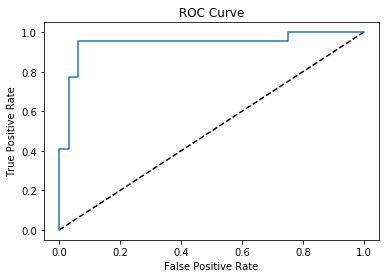

In [11]:
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [12]:
roc_auc_score(y_test, y_pred_prob)

0.9431818181818182

Tunning 

In [13]:
import numpy as np
from sklearn.model_selection import GridSearchCV
lr_range = np.linspace(0.01,0.8,10)
lr_method = ['constant','invscaling','adaptive']
hl_range = [(4,3,2),(3,2),(5,4,3,2),(10,5,3)]
act_range = ['logistic','tanh']
parameters = dict(learning_rate_init=lr_range,
                  hidden_layer_sizes = hl_range,
                  activation = act_range, 
                  learning_rate=lr_method)

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=42)

mlp = MLPClassifier(random_state=2019,learning_rate='constant')
mlpGrid = GridSearchCV(mlp, param_grid=parameters, cv=kfold,
                       scoring='roc_auc',verbose=True)
mlpGrid.fit(X, y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, 

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, 

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_ch...
             param_grid={'activation': ['logistic', 'tanh'],
                         'hidden_layer_sizes': [(4, 3, 2), (3, 2), (5, 4, 3, 2),
                                                (10, 5, 3)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                

Best Parameters

In [14]:
print(mlpGrid.best_params_)

print(mlpGrid.best_score_)

best_model = mlpGrid.best_estimator_

{'activation': 'logistic', 'hidden_layer_sizes': (3, 2), 'learning_rate': 'constant', 'learning_rate_init': 0.09777777777777778}
0.996103896103896


Weights

In [15]:
print(best_model.coefs_)
print(best_model.intercepts_)

[array([[-5.53533989,  7.83981065, -5.66979163],
       [-2.04806251,  2.68654586, -1.16305593]]), array([[ 3.82350781,  3.84298868],
       [-5.69053415, -4.78667746],
       [ 4.116222  ,  2.93728214]]), array([[-2.71643091],
       [-3.34712418]])]
[array([ 3.91640442, -5.27144001,  3.41320654]), array([-0.78352543, -0.62160549]), array([2.90081891])]
